In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [5]:
data=pd.read_csv("3.01.+Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [8]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [10]:
kmeans=KMeans(3)
kmeans.fit(x)

C:\Users\nrshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
idententify_clusters=kmeans.fit_predict(x)
idententify_clusters

C:\Users\nrshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 0, 1])

In [14]:
data1=data.copy()
data1["clusters"]=idententify_clusters
data1

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


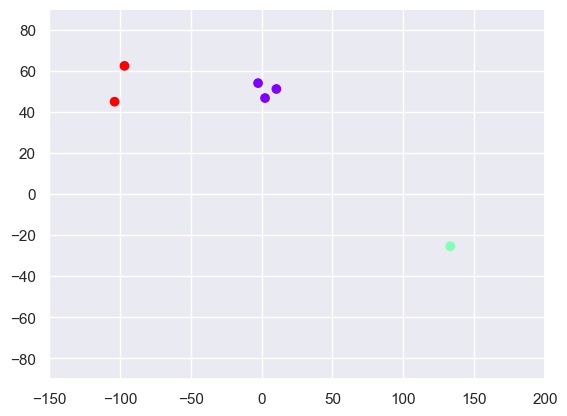

In [16]:
plt.scatter(data1["Longitude"],data1["Latitude"],c=data1["clusters"],cmap="rainbow")
plt.xlim(-150,200)
plt.ylim(-90,90)
plt.show()

In [24]:
data_mapped=data.copy()
data_mapped["Language"]=data_mapped["Language"].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [26]:
x1=data_mapped.iloc[:,3:4]
x1

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [28]:
kmeans.fit(x1)

C:\Users\nrshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
predict=kmeans.fit_predict(x1)
predict


C:\Users\nrshr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 0, 1, 0])

In [34]:
data_mapped["clusters"]=predict
data_mapped

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


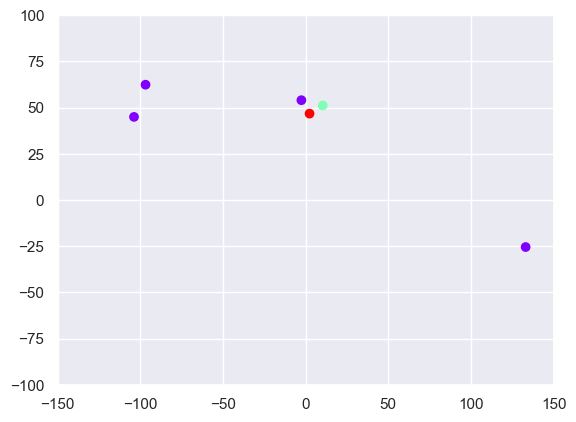

In [38]:
plt.scatter(data_mapped['Longitude'],data_mapped['Latitude'],c=data_mapped['clusters'],cmap='rainbow')
plt.xlim(-150,150)
plt.ylim(-100,100)
plt.show()
            